In [9]:
!pip install mlxtend
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [StackingClassifier]


In [5]:
X,y

(array([[3.5, 1.4],
        [3. , 1.4],
        [3.2, 1.3],
        [3.1, 1.5],
        [3.6, 1.4],
        [3.9, 1.7],
        [3.4, 1.4],
        [3.4, 1.5],
        [2.9, 1.4],
        [3.1, 1.5],
        [3.7, 1.5],
        [3.4, 1.6],
        [3. , 1.4],
        [3. , 1.1],
        [4. , 1.2],
        [4.4, 1.5],
        [3.9, 1.3],
        [3.5, 1.4],
        [3.8, 1.7],
        [3.8, 1.5],
        [3.4, 1.7],
        [3.7, 1.5],
        [3.6, 1. ],
        [3.3, 1.7],
        [3.4, 1.9],
        [3. , 1.6],
        [3.4, 1.6],
        [3.5, 1.5],
        [3.4, 1.4],
        [3.2, 1.6],
        [3.1, 1.6],
        [3.4, 1.5],
        [4.1, 1.5],
        [4.2, 1.4],
        [3.1, 1.5],
        [3.2, 1.2],
        [3.5, 1.3],
        [3.6, 1.4],
        [3. , 1.3],
        [3.4, 1.5],
        [3.5, 1.3],
        [2.3, 1.3],
        [3.2, 1.3],
        [3.5, 1.6],
        [3.8, 1.9],
        [3. , 1.4],
        [3.8, 1.6],
        [3.2, 1.4],
        [3.7, 1.5],
        [3.3, 1.4],


In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools



In [12]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))



<Figure size 1000x800 with 0 Axes>

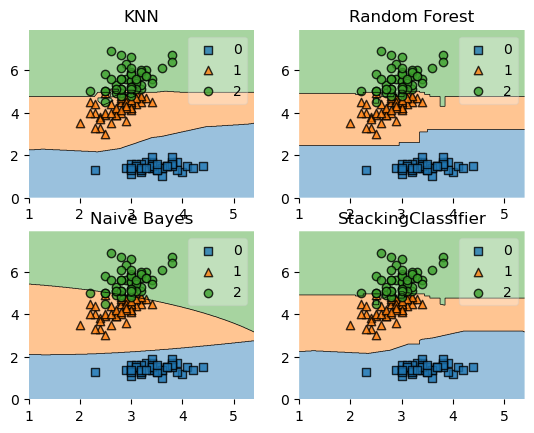

In [13]:
for clf, lab, grd in zip([clf1, clf2, clf3, sclf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                       
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

In [14]:
#FOR GRID SEARCH

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load data
data = load_iris()
X, y = data.data, data.target

# Define model and hyperparameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9666666666666668
